In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.helpers import melt_df

mls_bpr = pd.read_csv('./output/ranking_algo_exp/ml-latest-small_bpr.csv')
mls_lgcn = pd.read_csv('./output/ranking_algo_exp/ml-latest-small_lgcn.csv')

personality_bpr = pd.read_csv('./output/ranking_algo_exp/personality_bpr.csv')
personality_lgcn = pd.read_csv('./output/ranking_algo_exp/personality_lgcn.csv')

ml1m_bpr = pd.read_csv('./output/ranking_algo_exp/ml-1m_bpr.csv')
ml1m_lgcn = pd.read_csv('./output/ranking_algo_exp/ml-1m_lgcn.csv')

ml_bpr = pd.read_csv('./output/ranking_algo_exp/ml-latest_bpr.csv')
ml_lgcn = pd.read_csv('./output/ranking_algo_exp/ml-latest_lgcn.csv')

In [13]:
ml_lgcn

,uid,nbhd,nbhd_size,equiv_size,precision_nbhd,precision_equiv,recall_nbhd,recall_equiv,f1_nbhd,f1_equiv
0,6,"[99, 105, 126, 157, 221, 258, 272, 283, 341, 470]",7,31864,0.400000,0.679039,0.600000,0.807499,0.480000,0.737719
1,8,"[59, 72, 92, 111, 189, 258, 280, 360, 369, 495]",25,31846,0.593750,0.678968,0.875000,0.807341,0.707447,0.737611
2,14,"[16, 92, 141, 162, 165, 194, 219, 260, 348, 364]",9,31863,0.738095,0.678859,0.857143,0.807361,0.793177,0.737555
3,16,"[14, 99, 151, 303, 338, 362, 376, 444, 482, 513]",23,31848,0.643333,0.678936,0.900000,0.807303,0.750324,0.737576
4,30,"[46, 82, 213, 219, 268, 312, 353, 421, 449, 507]",26,31847,0.458333,0.679076,0.589286,0.807569,0.515625,0.737770
...,...,...,...,...,...,...,...,...,...,...
2941,15979,"[79, 138, 174, 389, 396, 408, 488, 502, 589, 605]",49,31824,0.888889,0.678712,0.804056,0.807398,0.844347,0.737483
2942,15983,"[26, 36, 104, 160, 164, 185, 219, 227, 300, 301]",28,31844,0.570370,0.678998,0.722222,0.807472,0.637377,0.737683
2943,15990,"[10, 31, 39, 192, 218, 219, 225, 300, 345, 360]",18,31854,0.583333,0.678996,0.800000,0.807403,0.674699,0.737653
2944,15993,"[34, 76, 197, 275, 276, 280, 338, 350, 351, 366]",20,31853,0.422222,0.679054,0.666667,0.807480,0.517007,0.737719


AttributeError: 'NoneType' object has no attribute 'remove'

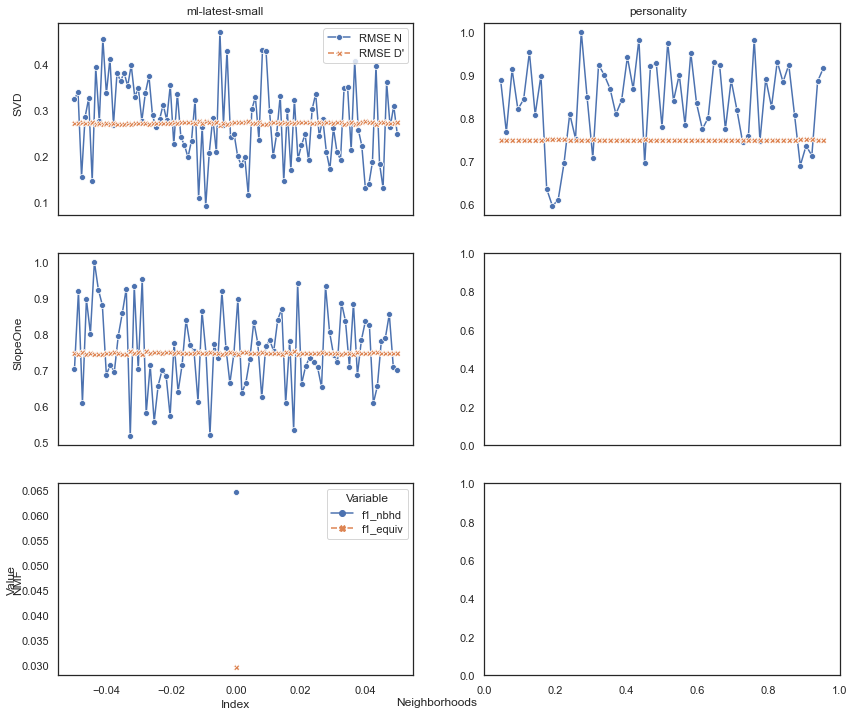

In [14]:
sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks
mls_bpr_f1 = melt_df(mls_bpr, ['f1_nbhd','f1_equiv'])
mls_lgcn_f1 = melt_df(mls_lgcn, ['f1_nbhd','f1_equiv'])
personality_bpr_f1 = melt_df(personality_bpr, ['f1_nbhd','f1_equiv'])
personality_lgcn_f1 = melt_df(personality_lgcn, ['f1_nbhd','f1_equiv'])

fig, ax = plt.subplots(3,2, figsize=(14, 12))

sns.lineplot(x=mls_bpr_f1.Index, y="Value", hue="Variable", data=mls_bpr_f1, ax=ax[0,0], markers=True, style="Variable")
sns.lineplot(x=mls_lgcn_f1.Index, y="Value", hue="Variable", data=mls_lgcn_f1, ax=ax[1,0], markers=True, style="Variable")
sns.lineplot(x=personality_bpr_f1.Index, y="Value", hue="Variable", data=personality_bpr_f1, ax=ax[2,0], markers=True, style="Variable")
sns.lineplot(x=personality_lgcn_f1.Index, y="Value", hue="Variable", data=personality_lgcn_f1, ax=ax[0,1], markers=True, style="Variable")
# sns.lineplot(x=personality_sone_rmse.Index, y="Value", hue="Variable", data=personality_sone_rmse, ax=ax[1,1], markers=True, style="Variable")
# sns.lineplot(x=personality_nmf_rmse.Index, y="Value", hue="Variable", data=personality_nmf_rmse, ax=ax[2,1], markers=True, style="Variable")

# Legend labels
ax[0,0].legend(labels=['RMSE N', 'RMSE D\''])

fig.text(0.5, 0.09, 'Neighborhoods', ha='center')
fig.text(0.29, 0.89, 'ml-latest-small', ha='center')
fig.text(0.72, 0.89, 'personality', ha='center')
fig.text(0.08, 0.2337, 'NMF', va='center', rotation='vertical')
fig.text(0.08, 0.51, 'SlopeOne', va='center', rotation='vertical')
fig.text(0.08, 0.788, 'SVD', va='center', rotation='vertical')

for i in range(0, 3):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

        # remove x-axis
        ax[i,j].set(xticklabels=[])

        # only keep legend for first row
        if j == 0 and i == 0:
            continue
        ax[i,j].get_legend().remove()

plt.savefig('./output/pred_algo_exp/exp_2_scatter.png', dpi=800, bbox_inches='tight')